<h3> Overview </h3>
Tune hyperparameters of Random Forest model. <br>
Then evaluate the models. 

Working with following datasets: 

white_wine_trans_5Q <br>
white_wine_trans_3Q <br>

red_wine_trans_3Q




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix, f1_score, ConfusionMatrixDisplay

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline

import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings

In [2]:
warnings.filterwarnings('ignore')

<h1> Import Transformed Data </h1>

<h2> 5 Quality Labels </h2>

<h3> White Wine </h3>

In [3]:
white_wine_trans_5Q = pd.read_csv('../transformed_wine_data/white_wine_trans_5Q.csv')

In [4]:
X_white = white_wine_trans_5Q.drop(['quality_label', 'quality', 'type'], axis = 1)
y_white = white_wine_trans_5Q['quality_label']

In [5]:
# Train | Test split
X_train, X_test, y_train, y_test = train_test_split(X_white, y_white, test_size=0.3, random_state=101, stratify = y_white)

No need to scale the features for random forest, since it evaluates each feature one at a time

In [6]:
# Tune hyperparameters
n_estimators=[90,110,130,150]
max_features= [2,3,4,5]
bootstrap = [True,False]

param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap} 

rf = RandomForestClassifier()

#grid_model = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 10)
grid_model = GridSearchCV(rf,param_grid)

In [7]:
grid_model.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [2, 3, 4, 5],
                         'n_estimators': [90, 110, 130, 150]})

In [8]:
grid_model.best_params_

{'bootstrap': False, 'max_features': 2, 'n_estimators': 130}

In [9]:
y_pred = grid_model.predict(X_test)
print(classification_report(y_test,y_pred, labels = ['low', 'lower_middle', 'middle', 'upper_middle', 'high']))

              precision    recall  f1-score   support

         low       0.71      0.22      0.33        55
lower_middle       0.68      0.68      0.68       437
      middle       0.66      0.78      0.71       660
upper_middle       0.73      0.56      0.63       264
        high       0.79      0.48      0.60        54

    accuracy                           0.68      1470
   macro avg       0.71      0.54      0.59      1470
weighted avg       0.68      0.68      0.67      1470



accuracy: 68% <br>
f1 macro avg: 59%

Text(0.5, 1.0, 'random forest – white wine – 5 labels')

<Figure size 432x288 with 0 Axes>

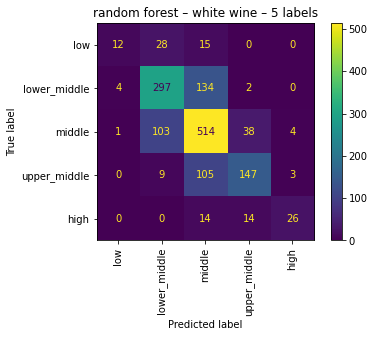

In [10]:
plt.figure()
plot_confusion_matrix(grid_model, X_test, y_test, labels = ['low', 'lower_middle', 'middle', 'upper_middle', 'high'])
plt.xticks(rotation = 90)
plt.title('random forest – white wine – 5 labels')

<h2> 3 Quality Labels </h2>

<h3> White Wine </h3>

In [11]:
white_wine_trans_3Q = pd.read_csv('../transformed_wine_data/white_wine_trans_3Q.csv')

In [12]:
X_white = white_wine_trans_3Q.drop(['quality_label', 'quality', 'type'], axis = 1)
y_white = white_wine_trans_3Q['quality_label']

In [13]:
# Train | Test split
X_train, X_test, y_train, y_test = train_test_split(X_white, y_white, test_size=0.3, random_state=101, stratify = y_white)

No need to scale the features for random forest, since it evaluates each feature one at a time

In [14]:
n_estimators=[90,110,130,150]
max_features= [2,3,4,5, 6]
bootstrap = [True,False]

param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap} 

rf = RandomForestClassifier()

#grid_model = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 10)
grid_model = GridSearchCV(rf,param_grid)

In [15]:
grid_model.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [2, 3, 4, 5, 6],
                         'n_estimators': [90, 110, 130, 150]})

In [16]:
grid_model.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 110}

In [17]:
y_pred = grid_model.predict(X_test)
print(classification_report(y_test,y_pred, labels = ['low', 'medium', 'high']))

              precision    recall  f1-score   support

         low       0.76      0.71      0.74       492
      medium       0.65      0.75      0.70       660
        high       0.75      0.59      0.66       318

    accuracy                           0.70      1470
   macro avg       0.72      0.68      0.70      1470
weighted avg       0.71      0.70      0.70      1470



accuracy: 70% <br>
f1 macro avg: 70%

Text(0.5, 1.0, 'random forest – white wine – 3 labels')

<Figure size 432x288 with 0 Axes>

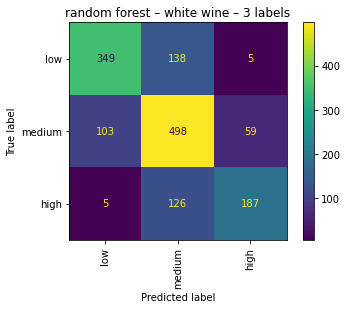

In [18]:
plt.figure()
plot_confusion_matrix(grid_model, X_test, y_test, labels = ['low', 'medium', 'high'])
plt.xticks(rotation = 90)
plt.title('random forest – white wine – 3 labels')

<h2> 3 Quality Labels </h2>

<h3> Red Wine </h3>

In [19]:
red_wine_trans_3Q = pd.read_csv('../transformed_wine_data/red_wine_trans_3Q.csv')

In [20]:
X_red = red_wine_trans_3Q.drop(['quality_label', 'quality', 'type'], axis = 1)
y_red = red_wine_trans_3Q['quality_label']

In [21]:
# Train | Test split
X_train, X_test, y_train, y_test = train_test_split(X_red, y_red, test_size=0.3, random_state=101, stratify = y_red)

No need to scale the features for random forest, since it evaluates each feature one at a time

In [22]:
n_estimators=[90,110,130,150]
max_features= [2,3,4,5, 6]
bootstrap = [True,False]

param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap} 

rf = RandomForestClassifier()

#grid_model = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 10)
grid_model = GridSearchCV(rf,param_grid)

In [23]:
grid_model.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [2, 3, 4, 5, 6],
                         'n_estimators': [90, 110, 130, 150]})

In [24]:
grid_model.best_params_

{'bootstrap': True, 'max_features': 4, 'n_estimators': 130}

In [25]:
y_pred = grid_model.predict(X_test)
print(classification_report(y_test,y_pred, labels = ['low', 'medium', 'high']))

              precision    recall  f1-score   support

         low       0.77      0.81      0.79       223
      medium       0.64      0.66      0.65       192
        high       0.65      0.49      0.56        65

    accuracy                           0.70       480
   macro avg       0.69      0.65      0.67       480
weighted avg       0.70      0.70      0.70       480



Text(0.5, 1.0, 'random forest – red wine – 3 labels')

<Figure size 432x288 with 0 Axes>

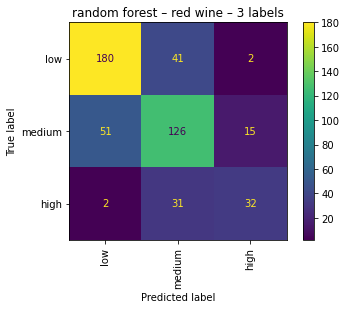

In [26]:
plt.figure()
plot_confusion_matrix(grid_model, X_test, y_test, labels = ['low', 'medium', 'high'])
plt.xticks(rotation = 90)
plt.title('random forest – red wine – 3 labels')